In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [64]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchwisdom.tabular.trainer import regressor_trainer
from torchwisdom.tabular.capsule import regression_data
from torchwisdom.core.callback import *

In [65]:
data = regression_data('data/boston/train.csv', target_columns='medv',  drop_columns=['ID'], 
                       batch_size=64, use_normalization=True, normalization_mode='minmax')

In [66]:
data.validset.__getitem__(0)

(tensor([0.0030, 0.1250, 0.2641, 0.0000, 0.2860, 0.5453, 0.9394, 0.5445, 0.1739,
         0.2352, 0.3023, 0.9889, 0.5166]), tensor([15.]))

In [67]:
model = nn.Sequential(
    nn.Linear(13, 64),
    nn.ReLU(),
    nn.BatchNorm1d(64),
    nn.Linear(64, 128),
    nn.ReLU(),
    nn.BatchNorm1d(128),
    nn.Linear(128, 1)
)

epoch,trn_loss,val_loss,trn_acc_reg,val_acc_reg,time,remain
1,549.023254,472.322815,0.000000,0.000000,0:00:00.22,0:00:04.27
2,546.288696,865.805847,0.000000,0.000000,0:00:00.29,0:00:05.38
3,436.334869,432.245422,0.000000,0.000000,0:00:00.24,0:00:04.09
4,368.626312,358.367737,3.000000,0.000000,0:00:00.26,0:00:04.28
5,277.217438,266.629150,2.400000,0.000000,0:00:00.27,0:00:04.18
6,178.471771,121.327377,4.400000,0.000000,0:00:00.25,0:00:03.57
7,87.483276,39.984211,10.800000,40.500000,0:00:00.24,0:00:03.04
8,32.062355,10.221926,60.400002,89.500000,0:00:00.24,0:00:02.87
9,20.113703,23.688564,80.599998,50.500000,0:00:00.29,0:00:03.55
10,29.098072,18.951384,58.799999,71.000000,0:00:00.24,0:00:02.28


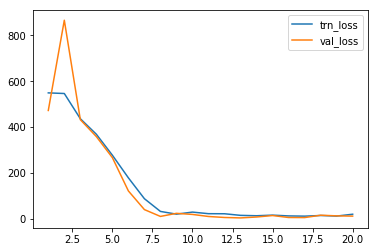

In [68]:
trainer = regressor_trainer(data, model)
trainer.resumeable(True)
trainer.save_best(True, metric="val_loss", mode="min")
trainer.fit(20, lr=0.01)

In [58]:
# trainer.load_best()

In [69]:
# feat, targ = next(iter(data.valid_loader))
feat, targ = data.validset.sample(10, use_transform=False)

In [70]:
trainer.predict(feature=feat, target=targ, show_table=True)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv_predict,medv_truth
0,0.14932,25.0,5.13,0.0,0.453,5.741,66.199997,7.2254,8.0,284.0,19.700001,395.109985,13.150000,18.545055,18.700001
1,0.76162,20.0,3.97,0.0,0.647,5.560,62.799999,1.9865,5.0,264.0,13.000000,392.399994,10.450000,24.929989,22.799999
2,0.19539,0.0,10.81,0.0,0.413,6.245,6.200000,5.2873,4.0,305.0,19.200001,377.170013,7.540000,23.968422,23.400000
3,1.05393,0.0,8.14,0.0,0.538,5.935,29.299999,4.4986,4.0,307.0,21.000000,386.850006,6.580000,22.418858,23.100000
4,0.03502,80.0,4.95,0.0,0.411,6.861,27.900000,5.1167,4.0,245.0,19.200001,396.899994,3.330000,30.932066,28.500000
5,0.63796,0.0,8.14,0.0,0.538,6.096,84.500000,4.4619,4.0,307.0,21.000000,380.019989,10.260000,19.240120,18.200001
6,0.53412,20.0,3.97,0.0,0.647,7.520,89.400002,2.1398,5.0,264.0,13.000000,388.369995,7.260000,37.550251,43.099998
7,0.04462,25.0,4.86,0.0,0.426,6.619,70.400002,5.4007,4.0,281.0,19.000000,395.630005,7.220000,25.778038,23.900000
8,0.09164,0.0,10.81,0.0,0.413,6.065,7.800000,5.2873,4.0,305.0,19.200001,390.910004,5.520000,24.118479,22.799999
9,0.15086,0.0,27.74,0.0,0.609,5.454,92.699997,1.8209,4.0,711.0,20.100000,395.089996,18.059999,16.830070,15.200000


In [71]:
trainer.export('export/boston_export.pth')

In [72]:
from torchwisdom.tabular.capsule import regression_data
from torchwisdom.tabular.predictor import TabularRegressorPredictor

data = regression_data('data/boston/train.csv', target_columns='medv',  drop_columns=['ID'], 
                       batch_size=64, use_normalization=False, normalization_mode='minmax')
feat, targ = data.validset.sample(10, shuffle=True)

In [73]:
file_path = "export/boston_export.pth"
pred = TabularRegressorPredictor(file_path)
df_result = pred.predict(feature=feat, target=targ, show_table=True)
df_result.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv_predict,medv_truth
0,2.44953,0.0,19.58,0.0,0.605,6.402,95.199997,2.2625,5.0,403.0,14.700000,330.040009,11.32,22.663822,22.299999
1,0.01501,80.0,2.01,0.0,0.435,6.635,29.700001,8.3440,4.0,280.0,17.000000,390.940002,5.99,26.719498,24.500000
2,0.76162,20.0,3.97,0.0,0.647,5.560,62.799999,1.9865,5.0,264.0,13.000000,392.399994,10.45,24.929989,22.799999
3,3.16360,0.0,18.10,0.0,0.655,5.759,48.200001,3.0665,24.0,666.0,20.200001,334.399994,14.13,16.249344,19.900000
4,0.14932,25.0,5.13,0.0,0.453,5.741,66.199997,7.2254,8.0,284.0,19.700001,395.109985,13.15,18.545055,18.700001
